<a id='notebook-top'></a>
This notebook plots column emission measure $EM_T = DEM(T)\Delta T$ in the east and west upflow regions with EM loci curves. The results are obtained by the `mcmc_dem` routine in [PINTofAle](https://hea-www.harvard.edu/PINTofALE/) through the interface provided by `chianti_dem` in the [CHIANTI](https://www.chiantidatabase.org/) package. The input line intensities were measured by EIS and corrected by the lastest onboard radiometric calibration ([Del Zanna et al., 2023](https://ui.adsabs.harvard.edu/abs/2023arXiv230806609D/abstract)). Link to [Figure 5](#figure-5).

Note: The internal hyperlink only works on [GitHub Pages](https://yjzhu-solar.github.io/EIS_DKIST_SolO/eis_eui_upflow_ipynb_html/dem_compare.html) or [nbviewer](https://nbviewer.org/github/yjzhu-solar/EIS_DKIST_SolO/blob/master/ipynb/ms_eis_eui_upflow/dem_compare.ipynb). Do not click when viewing the notebook on GitHub.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import CubicSpline
from matplotlib import rc_context, rcParams
from sunpy.io.special import read_genx

In [2]:
ms_style_dict = {'text.usetex': True, 'font.family': 'serif', 'axes.linewidth': 1.2,
                 'xtick.major.width': 1.2, 'xtick.major.size': 4,
                 'ytick.major.width': 1.2, 'ytick.major.size': 4,
                 'xtick.minor.width': 1.2, 'xtick.minor.size': 2,
                 'ytick.minor.width': 1.2, 'ytick.minor.size': 2,
                 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'text.latex.preamble': r'\usepackage[T1]{fontenc}'
                 r'\usepackage{amsmath}' r'\usepackage{siunitx}'
                 r'\sisetup{detect-all=True}' r'\usepackage{fixltx2e}'}
rcParams.update(ms_style_dict)

In [3]:
east_dem_sav = readsav("../../sav/CHIANTI/dem_output/dem_mcmc_final/east_upflow_region_0_sr_removed_mcmc/east_upflow_region_0_chianti_output_mcmc.save")
east_dem_sav2 = readsav("../../sav/CHIANTI/dem_output/dem_mcmc_final/east_upflow_region_0_sr_removed_mcmc/east_upflow_region_0_chianti_output_mcmc2.save")
west_dem_sav = readsav("../../sav/CHIANTI/dem_output/dem_mcmc_final/west_upflow_region_0_sr_removed_mcmc/west_upflow_region_0_chianti_output_mcmc.save")
west_dem_sav2 = readsav("../../sav/CHIANTI/dem_output/dem_mcmc_final/west_upflow_region_0_sr_removed_mcmc/west_upflow_region_0_chianti_output_mcmc2.save")

In [4]:
east_dem_sav2['obs_id']

array([b'"Fe VIII 185"', b'"Fe VIII 186"', b'"Fe IX 188"', b'"Fe IX 197"',
       b'"Fe X 184"', b'"Fe XI 188.216"', b'"Fe XI 188.299"',
       b'"Fe XII 192"', b'"Fe XII 195"', b'"Fe XIII 202"',
       b'"Fe XIII 203.826/.795"', b'"Fe XIV 264"', b'"Fe XIV 270"',
       b'"Fe XV 284"', b'"Fe XVI 262"'], dtype=object)

In [5]:
east_obs_id = [r"\textbf{Fe\,\textsc{viii} 18.52}" + "\n" + r"\textbf{(bl Ni\,\textsc{xvi})}",
               r"\textbf{Fe\,\textsc{viii} 18.65}",
               r"\textbf{Fe\,\textsc{ix} 18.85}",
               r"\textbf{Fe\,\textsc{ix} 19.78}",
               r"\textbf{Fe\,\textsc{x} 18.45}",
               r"\textbf{Fe\,\textsc{xi} 18.82",
               r"\textbf{Fe\,\textsc{xi} 18.83}",
               r"\textbf{Fe\,\textsc{xii} 19.24}",
               r"\textbf{Fe\,\textsc{xii} 19.51}",
               r"\textbf{Fe\,\textsc{xiii} 20.2}",
               r"\textbf{Fe\,\textsc{xiii} 20.38}" + "\n" + r"\textbf{(sbl)}",
               r"\textbf{Fe\,\textsc{xiv} 26.48}",
               r"\textbf{Fe\,\textsc{xiv} 27.05}",
               r"\textbf{Fe\,\textsc{xv} 28.41}",
               r"\textbf{Fe\,\textsc{xvi} 26.29}",]

east_id_text_xy = [
    (5.8,1.17), # Fe viii 18.52
    (5.75, 0.89), # Fe viii 18.65
    (5.85, 1.3), # Fe ix 18.85
    (5.8, 0.7), # Fe ix 19.78
    (5.9, 0.5), # Fe x 18.45
    (6.1, 1.28), # Fe xi 18.82
    (6.0, 0.92), # Fe xi 18.83
    (6.21, 1.34), # Fe xii 19.24
    (6.2, 0.67), # Fe xii 19.51
    (6.35, 0.5), # Fe xiii 20.2
    (6.29, 1.09), # Fe xiii 20.38
    (6.42, 0.7), # Fe xiv 26.48
    (6.43, 0.88), # Fe xiv 27.05
    (6.41, 1.26), # Fe xv 28.41
    (6.42, 1.20), # Fe xvi 26.29
    ]

west_id_text_xy = [
    (5.73,1.05), # Fe viii 18.52
    (5.75, 1.23), # Fe viii 18.65
    (5.8, 0.78), # Fe ix 18.85
    (5.85, 1.34), # Fe ix 19.78
    (5.99, 1.27), # Fe x 18.45
    (6.0, 0.68), # Fe xi 18.82
    (5.95, 0.88), # Fe xi 18.83
    (6.15, 0.78), # Fe xii 19.24
    (6.15, 1.14), # Fe xii 19.51
    (6.35, 0.95), # Fe xiii 20.2
    (6.36, 0.8), # Fe xiii 20.38
    (6.2, 1.23), # Fe xiv 26.48
    (6.43, 1.17), # Fe xiv 27.05
    (6.35, 0.5), # Fe xv 28.41
    (6.43, 1.34), # Fe xvi 26.29
    ]

<a id='figure-5'></a>
### Figure 5
(You may have to pull down to see the notebook preview of the figure)

[back to top](#notebook-top) 

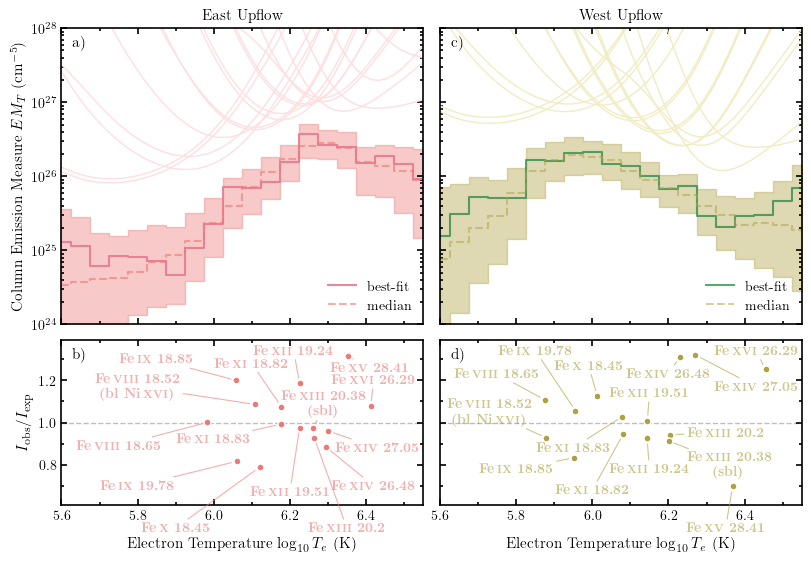

In [6]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,5.5),sharex=True, layout='constrained',
                                        height_ratios=[1.8,1])

east_dem_best_fit = east_dem_sav['simdem'][-1,:] # this is actually dem * T
east_dem_lower_bound = east_dem_sav['demerr'][0,:]
east_dem_upper_bound = east_dem_sav['demerr'][1,:]
east_dem_median = np.nanmedian(east_dem_sav['simdem'][:-1,:], axis=0)

dlog10T_east = np.abs(np.nanmean(np.diff(east_dem_sav['logt'])))

east_column_dem_best_fit = east_dem_best_fit * np.log(10**dlog10T_east) # dT = T*ln10*d(log10(T)) = T*ln(10^d(log10(T)))
east_column_dem_lower_bound = east_dem_lower_bound * np.log(10**dlog10T_east)
east_column_dem_upper_bound = east_dem_upper_bound * np.log(10**dlog10T_east)
east_column_dem_median = east_dem_median * np.log(10**dlog10T_east)

west_dem_best_fit = west_dem_sav['simdem'][-1,:]
west_dem_lower_bound = west_dem_sav['demerr'][0,:]
west_dem_upper_bound = west_dem_sav['demerr'][1,:]
west_dem_median = np.nanmedian(west_dem_sav['simdem'][:-1,:], axis=0)

dlog10T_west = np.abs(np.nanmean(np.diff(west_dem_sav['logt'])))
west_column_dem_best_fit = west_dem_best_fit * np.log(10**dlog10T_west)
west_column_dem_lower_bound = west_dem_lower_bound * np.log(10**dlog10T_west)
west_column_dem_upper_bound = west_dem_upper_bound * np.log(10**dlog10T_west)
west_column_dem_median = west_dem_median * np.log(10**dlog10T_west)

ax1.step(east_dem_sav['logt'], east_column_dem_best_fit, where='mid',
        label='best-fit', color='#E87A90', alpha=0.9)

ax1.step(east_dem_sav['logt'], east_column_dem_median, where='mid',
        label='median', color='#EB7A77', alpha=0.6, ls='--')    

ax1.fill_between(east_dem_sav['logt'], east_column_dem_lower_bound, east_column_dem_upper_bound,
                color="#EB7A77", alpha=0.4, step="mid")

logt_smooth = np.linspace(east_dem_sav2['logt_interpolated'][0], east_dem_sav2['logt_interpolated'][-1], 50)
for obs_int, ch_tot_contr in zip(east_dem_sav2['obs_int'], east_dem_sav2['ch_tot_contr_interpolated']):
    spline_east = CubicSpline(east_dem_sav2['logt_interpolated'], np.log10(obs_int/ch_tot_contr),
                            bc_type='natural')
    ax1.plot(logt_smooth, 10**spline_east(logt_smooth), color='#FEDFE1', alpha=1, lw=1, ls='-')

ax1.set_ylim(bottom=1e24, top=1e28)
ax1.set_xlim(east_dem_sav['logt'][0], east_dem_sav['logt'][-1])

ax3.scatter(np.log10(east_dem_sav2['t_eff']), east_dem_sav2['exp_int']/east_dem_sav2['obs_int'], facecolor="#EB7A77", alpha=1,
            s=25, edgecolor='white', lw=1, zorder=5)

ax3.set_ylim(1 - 0.39, 1 + 0.39)

ax3.axhline(1, color='grey', ls='--', lw=1, alpha=0.5, zorder=0)

for t_eff, obs_int, exp_int, obs_id, text_xy in zip(east_dem_sav2['t_eff'], east_dem_sav2['obs_int'],
                                        east_dem_sav2['exp_int'], east_obs_id, east_id_text_xy):
    ax3.annotate(obs_id, (np.log10(t_eff), exp_int/obs_int), xytext=text_xy,
                 fontsize=10, ha='center', va='center', color="#EB7A77",
                 arrowprops=dict(edgecolor="#EB7A77",arrowstyle="-",lw=0.8,
                                 shrinkA=0, shrinkB=4, alpha=0.6), alpha=0.6,
                 bbox=dict(pad=2, edgecolor='none', facecolor='none'), zorder=3)
    
ax3.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    

ax2.step(west_dem_sav['logt'], west_column_dem_best_fit, where='mid',
            label='best-fit', color='#1B813E', alpha=0.7)

ax2.step(west_dem_sav['logt'], west_column_dem_median, where='mid',
            label='median', color='#ADA142', alpha=0.5, ls='--')    

ax2.fill_between(west_dem_sav['logt'], west_column_dem_lower_bound, west_column_dem_upper_bound,
                    color="#ADA142", alpha=0.4, step="mid")

logt_smooth = np.linspace(west_dem_sav2['logt_interpolated'][0], west_dem_sav2['logt_interpolated'][-1], 50)
for obs_int, ch_tot_contr in zip(west_dem_sav2['obs_int'], west_dem_sav2['ch_tot_contr_interpolated']):
    spline_west = CubicSpline(west_dem_sav2['logt_interpolated'], np.log10(obs_int/ch_tot_contr),
                            bc_type='natural')
    ax2.plot(logt_smooth, 10**spline_west(logt_smooth), color='#F2ECC3', alpha=1, lw=1, ls='-')

ax2.set_ylim(bottom=1e24, top=1e28)
ax2.tick_params(which='both', labelleft=False)

ax4.scatter(np.log10(west_dem_sav2['t_eff']), west_dem_sav2['obs_int']/west_dem_sav2['exp_int'], color='#ADA142', alpha=1,
            s=25, edgecolor='white', lw=1, zorder=5)
ax4.set_ylim(1-0.39, 1+0.39)
ax4.tick_params(which='both', labelleft=False)

ax4.axhline(1, color='grey', ls='--', lw=1, alpha=0.5, zorder=0)

for t_eff, obs_int, exp_int, obs_id, text_xy in zip(west_dem_sav2['t_eff'], west_dem_sav2['obs_int'],
                                        west_dem_sav2['exp_int'], east_obs_id, west_id_text_xy):

    ax4.annotate(obs_id, (np.log10(t_eff), obs_int/exp_int), xytext=text_xy,
                fontsize=10, ha='center', va='center', color="#ADA142",
                arrowprops=dict(edgecolor="#ADA142",arrowstyle="-",lw=0.8,
                                shrinkA=0, shrinkB=4, alpha=0.6), alpha=0.6,
                bbox=dict(pad=2, edgecolor='none', facecolor='none'), zorder=3)

ax4.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    
for ax_ in (ax1,ax2):
    ax_.set_yscale('log')

for ax_ in (ax1,ax2,ax3,ax4):
    ax_.tick_params(which='both', left=True, right=True, bottom=True, top=True)
    ax_.xaxis.set_minor_locator(plt.MultipleLocator(0.1))   

ax1.set_ylabel(r"Column Emission Measure $EM_T$ (cm$^{-5}$)", fontsize=11)
ax3.set_ylabel(r"$I_{\rm obs}/I_{\rm exp}$", fontsize=11)
ax1.set_title("East Upflow", fontsize=11)
ax2.set_title("West Upflow", fontsize=11)
ax3.set_xlabel(r"Electron Temperature $\log_{10} T_e$ (K)", fontsize=11, labelpad=10)
ax4.set_xlabel(r"Electron Temperature $\log_{10} T_e$ (K)", fontsize=11, labelpad=10)

ax1.legend(loc='lower right', fontsize=10, frameon=False)
ax2.legend(loc='lower right', fontsize=10, frameon=False)
ax1.text(0.03, 0.975, r"a)", transform=ax1.transAxes, fontsize=11, ha='left', va='top')
ax3.text(0.03, 0.96, r"b)", transform=ax3.transAxes, fontsize=11, ha='left', va='top')
ax2.text(0.03, 0.975, r"c)", transform=ax2.transAxes, fontsize=11, ha='left', va='top')
ax4.text(0.03, 0.96, r"d)", transform=ax4.transAxes, fontsize=11, ha='left', va='top')

fig.savefig("../../figs/ms_eis_eui_upflow/eis_dem.pdf", bbox_inches='tight', dpi=300)
fig.savefig("../../figs/ms_eis_eui_upflow_png/eis_dem.png", bbox_inches='tight', dpi=300)

In [47]:
east_dem_sav_photospheric = readsav("../../sav/CHIANTI/dem_output/dem_mcmc_final/east_upflow_region_0_sr_removed_mcmc_photospheric/east_upflow_region_0_chianti_output_mcmc.save")
west_dem_sav_photospheric = readsav("../../sav/CHIANTI/dem_output/dem_mcmc_final/west_upflow_region_0_sr_removed_mcmc_photospheric/west_upflow_region_0_chianti_output_mcmc.save")

In [48]:
east_Si_X_goft_sav = read_genx("../../sav/CHIANTI/dem_output/dem_mcmc_final/east_upflow_region_0_sr_removed_mcmc_photospheric/east_upflow_Si_10_output.contribution.genx")
east_S_X_goft_sav = read_genx("../../sav/CHIANTI/dem_output/dem_mcmc_final/east_upflow_region_0_sr_removed_mcmc_photospheric/east_upflow_S_10_output.contribution.genx")
west_Si_X_goft_sav = read_genx("../../sav/CHIANTI/dem_output/dem_mcmc_final/west_upflow_region_0_sr_removed_mcmc_photospheric/west_upflow_Si_10_output.contribution.genx")
west_S_X_goft_sav = read_genx("../../sav/CHIANTI/dem_output/dem_mcmc_final/west_upflow_region_0_sr_removed_mcmc_photospheric/west_upflow_S_10_output.contribution.genx")

In [49]:
em_start_index = 32 # logT = 5.6
em_end_index = 51 # logT = 6.55

Si_abund = 3.23594e-05 # from asplund et al 2021, photospheric abundance
S_abund = 1.31826e-05 # from asplund et al 2021, photospheric abundance

east_Si_X_goft = east_Si_X_goft_sav["LINES"][0]['GOFT'][em_start_index:em_end_index + 1] * Si_abund
east_S_X_goft = east_S_X_goft_sav["LINES"]['GOFT'][em_start_index:em_end_index + 1] * S_abund
west_Si_X_goft = west_Si_X_goft_sav["LINES"][0]['GOFT'][em_start_index:em_end_index + 1] * Si_abund
west_S_X_goft = west_S_X_goft_sav["LINES"]['GOFT'][em_start_index:em_end_index + 1] * S_abund

In [51]:
east_int_Si_X_obs = np.load("../../sav/CHIANTI/dem_input/east_SiX_261_upflow_regions_int_mean_radcal_no_sl.npy")
east_int_S_X_obs = np.load("../../sav/CHIANTI/dem_input/east_SX_264_upflow_regions_int_mean_radcal_no_sl.npy")
west_int_Si_X_obs = np.load("../../sav/CHIANTI/dem_input/west_SiX_261_upflow_regions_int_mean_radcal_no_sl.npy")
west_int_S_X_obs = np.load("../../sav/CHIANTI/dem_input/west_SX_264_upflow_regions_int_mean_radcal_no_sl.npy")

In [56]:
def calc_FIP_ratio(logt, int_SiX_obs, int_SX_obs, mcmc_dem, SiX_goft, SX_goft):
    dlog10T = np.abs(np.nanmean(np.diff(logt)))
    column_em = mcmc_dem * np.log(10**dlog10T)
    int_SiX_exp = np.sum(SiX_goft * column_em)

    scale_ratio = int_SiX_obs/int_SiX_exp

    column_em_scaled = column_em * scale_ratio
    int_SX_exp = np.sum(SX_goft * column_em_scaled)

    fip_bias = int_SX_exp/int_SX_obs

    return fip_bias, scale_ratio

In [59]:
east_dem_sav_photospheric['simdem'][-1,:]/east_dem_sav['simdem'][-1,:]

array([3.74888458, 1.11027882, 3.12134101, 2.40962987, 4.62005228,
       3.62281798, 5.25194745, 2.62748176, 5.07288251, 2.09341673,
       3.66129273, 3.95457713, 3.2764216 , 2.66573706, 3.41233242,
       3.60758686, 3.02411375, 2.11928034, 2.29775548, 3.05013819])

In [57]:
calc_FIP_ratio(east_dem_sav['logt'], east_int_Si_X_obs, east_int_S_X_obs, east_dem_sav_photospheric['simdem'][-1,:],
                east_Si_X_goft, east_S_X_goft)

(1.186710606487336, 0.8805937863535639)

In [58]:
calc_FIP_ratio(west_dem_sav['logt'], west_int_Si_X_obs, west_int_S_X_obs, west_dem_sav_photospheric['simdem'][-1,:],
                west_Si_X_goft, west_S_X_goft)

(0.9250608442543271, 0.8980588855137109)

In [60]:
fip_all_batches_east = np.zeros((east_dem_sav['simdem'].shape[0]-1, 2))
for ii in range(east_dem_sav['simdem'].shape[0]-1):
    fip_all_batches_east[ii,:] = calc_FIP_ratio(east_dem_sav['logt'], east_int_Si_X_obs, east_int_S_X_obs, east_dem_sav_photospheric['simdem'][ii,:],
                east_Si_X_goft, east_S_X_goft)

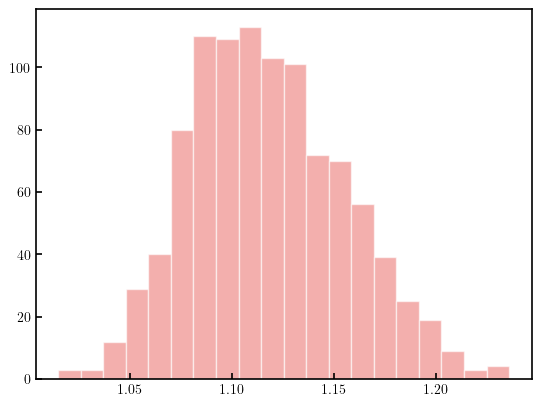

In [61]:
_ = plt.hist(fip_all_batches_east[:,0], bins=20, color='#EB7A77', alpha=0.6, edgecolor='white')

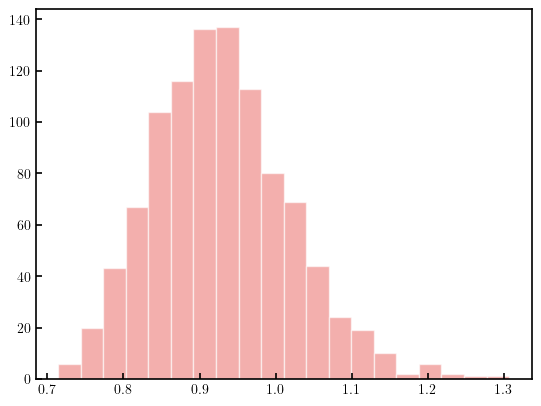

In [62]:
_ = plt.hist(fip_all_batches_east[:,1], bins=20, color='#EB7A77', alpha=0.6, edgecolor='white')